In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import os
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
#import nemplot
import openpyxl as ex
from scipy.optimize import curve_fit
from collections import Counter
import collections

In [6]:
A = np.array([1,2,3])

In [7]:
A.T

array([1, 2, 3])

In [2]:
wb = ex.load_workbook(Path.home()/'Desktop'/'Simulações master.xlsx')
ws = wb['THE FINAL']

In [3]:
#N = 1400
N = 1400
R2 = np.array([])
R3 = np.array([])
R4 = np.array([])
h_fc = np.array([])
L_mag = np.array([])
B = np.array([])
phi = np.array([])
B_high = np.array([])

for i in range(4,N+1):
#for i in range(N,1744):
    if ws.cell(row=i, column=5).value == None or ws.cell(row=i, column=5).value==0:
        continue
    if ws.cell(row=i, column=12).value < 2.1:
        continue
    R2 = np.append(R2, float(ws.cell(row=i, column=5).value))
    R3 = np.append(R3, float(ws.cell(row=i, column=6).value))
    R4 = np.append(R4, float(ws.cell(row=i, column=7).value))
    h_fc = np.append(h_fc, float(ws.cell(row=i, column=8).value))
    L_mag = np.append(L_mag, float(ws.cell(row=i, column=9).value))
    phi = np.append(phi, float(ws.cell(row=i, column=11).value))
    B_high = np.append(B_high, float(ws.cell(row=i, column=12).value))
    B = np.append(B, float(ws.cell(row=i, column=14).value))
R1 = 30*np.ones(len(R2))
V_magnet = (R4**2 - R3**2)*(2*np.pi*phi/180)
V_gap = (R3**2 - R2**2)*np.pi
V_out = (R4**2 - R3**2)*np.pi
R5 = R4 + h_fc
V_fc =(R5**2 - R4**2)*np.pi
T= (V_gap/V_out)
V_in = R2**2 - R1**2
h_gap = R3-R2
B_rem = 1.41

In [4]:
len(R2)


579

# Fitting clássico definindo funções

In [5]:
def B3D(X,a,b,c,d,e):
    V_gap, V_magnet, R4, L_mag,V_fc,V_out = X
    B1 = (V_gap/V_magnet)**b
    B2 = np.exp(-c*R4/L_mag)
    B3 = (np.tanh((d*V_fc/V_magnet))) + e
    #B3 = np.exp(-d*h_fc/R4)
    return a*B1*B2*B3

In [6]:
M = curve_fit(B3D,(V_gap,V_magnet,R4,L_mag,V_fc,V_out),B,maxfev=1000000000)
M[0]

array([ 0.16214179, -0.35535654,  0.12975519,  1.88856032,  6.11336081])

Coefs =  [ 0.16214179 -0.35535654  0.12975519  1.88856032  6.11336081]


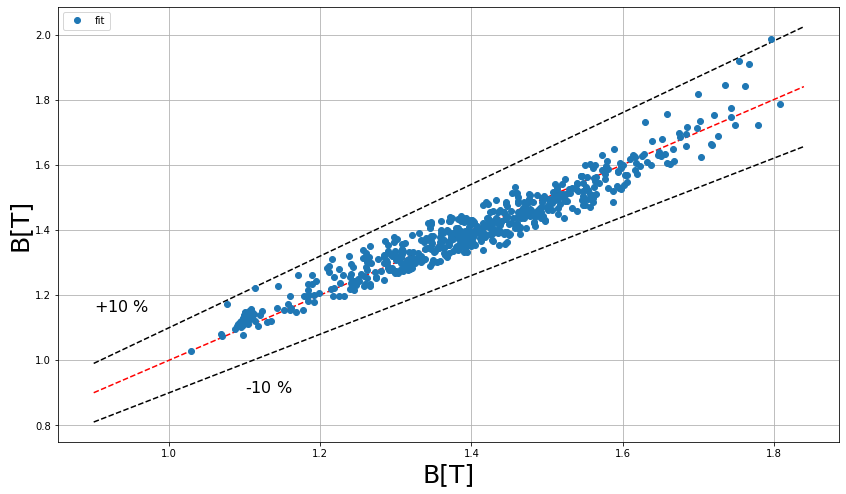

Máximo erro = 9.583%
Médio erro = 2.252%


In [7]:
M = curve_fit(B3D,(V_gap,V_magnet,R4,L_mag,V_fc,V_out),B,maxfev=1000000000)
print('Coefs = ',M[0])
B_error = np.arange(0.9,1.85,0.01)
plt.plot(B_error,0.9*B_error,'k--')
plt.plot(B_error,1.1*B_error,'k--')
plt.plot(B_error,1*B_error,'r--')
B3Dfit = B3D((V_gap,V_magnet,R4,L_mag,V_fc,V_out),M[0][0],M[0][1],M[0][2],M[0][3],M[0][4])
plt.plot(B,B3Dfit,'o',label='fit')

plt.text(1.1, 0.9, '-10 $\%$', fontsize=16)
plt.text(0.9, 1.15, '+10 $\%$', fontsize=16)
plt.grid()
plt.legend()
plt.savefig('MagnetFit2.png',format = 'png')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.ylabel('B[T]', fontsize = 25)
plt.xlabel('B[T]', fontsize = 25)
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.show()

erro = 100*(max(abs((B3D((V_gap,V_magnet,R4,L_mag,V_fc,V_out),M[0][0],M[0][1],M[0][2],M[0][3],M[0][4])-B)/B3D((V_gap,V_magnet,R4,L_mag,V_fc,V_out),M[0][0],M[0][1],M[0][2],M[0][3],M[0][4]))))
print('Máximo erro = %.3f%%' %erro)
erro2 = 100*(np.mean(abs((B3D((V_gap,V_magnet,R4,L_mag,V_fc,V_out),M[0][0],M[0][1],M[0][2],M[0][3],M[0][4])-B)/B3D((V_gap,V_magnet,R4,L_mag,V_fc,V_out),M[0][0],M[0][1],M[0][2],M[0][3],M[0][4]))))
print('Médio erro = %.3f%%' %erro2)

# Regressão polinomial

In [8]:
import sklearn
from sklearn.neural_network import MLPRegressor as MLP
from sklearn.preprocessing import PolynomialFeatures as Poly
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [18]:
V_gap

array([45553.09347705, 45553.09347705, 45553.09347705, 45553.09347705,
       45553.09347705, 45553.09347705, 45553.09347705, 45553.09347705,
       45553.09347705, 45553.09347705, 45553.09347705, 45553.09347705,
       45553.09347705, 45553.09347705, 45553.09347705, 45553.09347705,
       45553.09347705, 45553.09347705, 45553.09347705, 45553.09347705,
       45553.09347705, 45553.09347705, 45553.09347705, 45553.09347705,
       45553.09347705, 45553.09347705, 45553.09347705, 45553.09347705,
       45553.09347705, 45553.09347705, 45553.09347705, 45553.09347705,
       45553.09347705, 45553.09347705, 45553.09347705, 45553.09347705,
       45553.09347705, 45553.09347705, 45553.09347705, 45553.09347705,
       45553.09347705, 45553.09347705, 45553.09347705, 45553.09347705,
       45553.09347705, 45553.09347705, 45553.09347705, 45553.09347705,
       45553.09347705, 45553.09347705, 45553.09347705, 45553.09347705,
       45553.09347705, 45553.09347705, 20106.19298297, 20106.19298297,
      

In [9]:
X = np.array([[0,0,0,0,0,0]])
X = np.array([V_gap,V_magnet,R4,L_mag,V_fc,V_out])  
X.T

array([[4.55530935e+04, 1.14353973e+05, 3.50000000e+02, 1.40000000e+02,
        4.52389342e+04, 2.94053072e+05],
       [4.55530935e+04, 1.14353973e+05, 3.50000000e+02, 1.40000000e+02,
        4.99010577e+04, 2.94053072e+05],
       [4.55530935e+04, 1.14353973e+05, 3.50000000e+02, 1.40000000e+02,
        5.45883139e+04, 2.94053072e+05],
       ...,
       [4.90088454e+04, 2.24309715e+05, 4.19000000e+02, 1.53000000e+02,
        1.19012954e+05, 4.48619431e+05],
       [4.53771643e+04, 2.89380477e+05, 4.13000000e+02, 1.41000000e+02,
        1.05981628e+05, 4.34070715e+05],
       [3.95432267e+04, 1.54076270e+05, 3.75000000e+02, 1.44000000e+02,
        1.09754681e+05, 3.46671608e+05]])

In [10]:
model = make_pipeline(Poly(degree=1), Ridge(alpha=0))
model.fit(X.T,B)
B_pred = model.predict(X.T)

# Acurácia no conjunto de treinamento

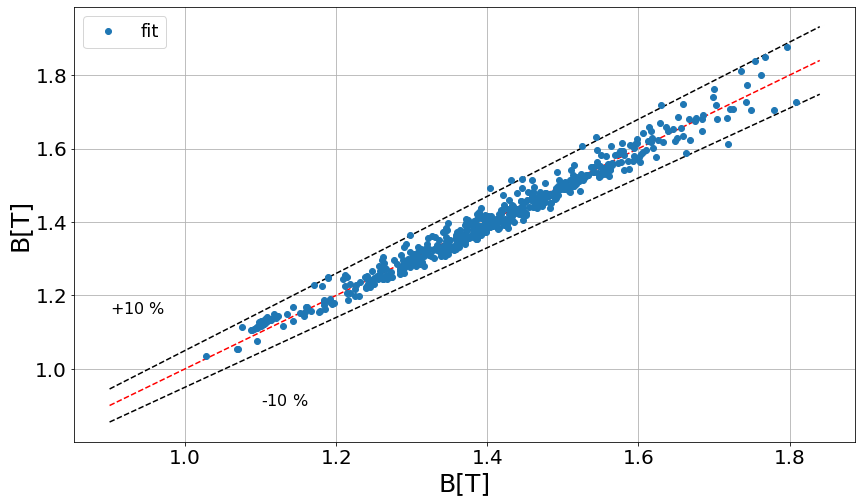

score =  0.9758694054280405


In [11]:
B_error = np.arange(0.9,1.85,0.01)
plt.plot(B_error,0.95*B_error,'k--')
plt.plot(B_error,1.05*B_error,'k--')
plt.plot(B_error,1*B_error,'r--')
plt.plot(B,B_pred,'o',label='fit')

plt.text(1.1, 0.9, '-10 $\%$', fontsize=16)
plt.text(0.9, 1.15, '+10 $\%$', fontsize=16)
plt.grid()
plt.legend()
plt.savefig('MagnetFit2.png',format = 'png')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.ylabel('B[T]', fontsize = 25)
plt.xlabel('B[T]', fontsize = 25)
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.show()

print('score = ', model.score(X.T,B))

In [12]:
#conjunto de teste

N2 = 1744
R22 = np.array([])
R32 = np.array([])
R42 = np.array([])
h_fc2 = np.array([])
L_mag2 = np.array([])
B2 = np.array([])
phi2 = np.array([])
B_high2 = np.array([])

for i in range(N+1,N2+1):
#for i in range(4,1744):
    if ws.cell(row=i, column=5).value == None or ws.cell(row=i, column=5).value==0:
        continue
    if ws.cell(row=i, column=12).value < 2.1:
        continue
    '''    #if ws.cell(row=i, column=11).value != 35:
    #    continue
    #if int(ws.cell(row=i, column=8).value)!=25:
    #    continue
    #if ws.cell(row=i, column=14).value < 1.2 or ws.cell(row=i, column=14).value > 1.6:
    #    continue
    R5 = ws.cell(row=i, column=7).value + ws.cell(row=i, column=8).value
    V_fc =(R5**2 - ws.cell(row=i, column=7).value**2)*np.pi
    V_out = (ws.cell(row=i, column=7).value**2 - ws.cell(row=i, column=6).value**2)*np.pi
    #if np.floor(V_fc)!=105321:
    #    continue
    if np.floor(V_out)!=294053:
        continue
    if ws.cell(row=i, column=9).value!= 140:
        continue
    if ws.cell(row=i, column=5).value == 150:
        break'''
    R22 = np.append(R22, float(ws.cell(row=i, column=5).value))
    R32 = np.append(R32, float(ws.cell(row=i, column=6).value))
    R42 = np.append(R42, float(ws.cell(row=i, column=7).value))
    h_fc2 = np.append(h_fc2, float(ws.cell(row=i, column=8).value))
    L_mag2 = np.append(L_mag2, float(ws.cell(row=i, column=9).value))
    phi2 = np.append(phi2, float(ws.cell(row=i, column=11).value))
    B_high2 = np.append(B_high2, float(ws.cell(row=i, column=12).value))
    B2 = np.append(B2, float(ws.cell(row=i, column=14).value))
R12 = 30*np.ones(len(R22))
V_magnet2 = (R42**2 - R32**2)*(2*np.pi*phi2/180)
V_gap2 = (R32**2 - R22**2)*np.pi
V_out2 = (R42**2 - R32**2)*np.pi
R52 = R42 + h_fc2
V_fc2 =(R52**2 - R42**2)*np.pi
T2= (V_gap2/V_out2)
V_in2 = R22**2 - R12**2
h_gap2 = R32-R22
B_rem2 = 1.41
print(len(R22))

344


In [13]:
X2 = np.array([V_gap2,V_magnet2,R42,L_mag2,V_fc2,V_out2]) 
B_pred_val = model.predict(X2.T)

In [14]:
len(X2.T)

344

# Acurácia no conjunto de teste

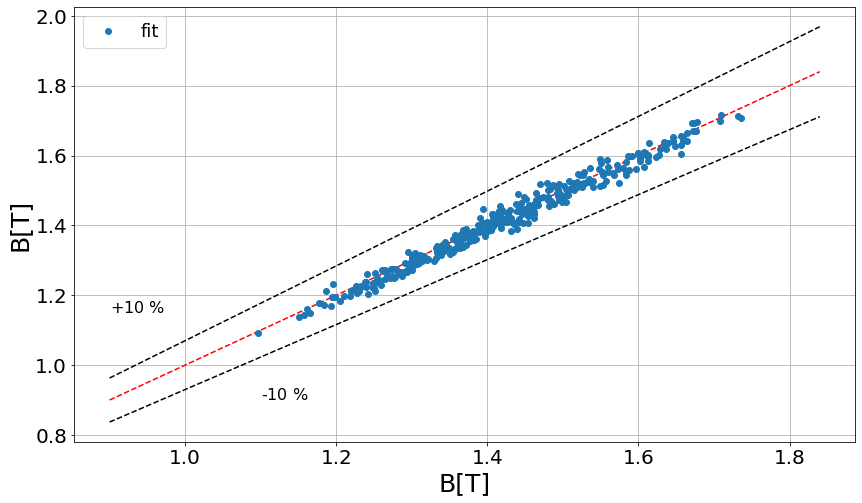

score =  0.9775530068517172


In [15]:
B_error = np.arange(0.9,1.85,0.01)
plt.plot(B_error,0.93*B_error,'k--')
plt.plot(B_error,1.07*B_error,'k--')
plt.plot(B_error,1*B_error,'r--')
plt.plot(B2,B_pred_val,'o',label='fit')

plt.text(1.1, 0.9, '-10 $\%$', fontsize=16)
plt.text(0.9, 1.15, '+10 $\%$', fontsize=16)
plt.grid()
plt.legend()
plt.savefig('MagnetFit2.png',format = 'png')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 8)
plt.ylabel('B[T]', fontsize = 25)
plt.xlabel('B[T]', fontsize = 25)
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.show()

print('score = ', model.score(X2.T,B2))

In [16]:
print(__doc__)

# Author: Mathieu Blondel
#         Jake Vanderplas
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# generate points used to plot
x_plot = np.linspace(0, 10, 100)

# generate points and keep a subset of them
x = np.linspace(0, 10, 100)
rng = np.random.RandomState(0)
rng.shuffle(x)
x = np.sort(x[:20])
y = f(x)

# create matrix versions of these arrays
X = x[:, np.newaxis]
X_plot = x_plot[:, np.newaxis]



Automatically created module for IPython interactive environment


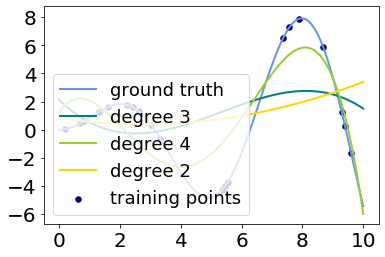

In [17]:
colors = ['teal', 'yellowgreen', 'gold']
lw = 2
plt.plot(x_plot, f(x_plot), color='cornflowerblue', linewidth=lw,
         label="ground truth")
plt.scatter(x, y, color='navy', s=30, marker='o', label="training points")

for count, degree in enumerate([3, 4, 2]):
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha = 1))
    model.fit(X, y)
    y_plot = model.predict(X_plot)
    plt.plot(x_plot, y_plot, color=colors[count], linewidth=lw,
             label="degree %d" % degree)

plt.legend(loc='lower left')
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.show()